This is a model that predicts how well an NBA player will perform in future games based on their 2018 to 2019 NBA stats. The versatility index of a player is a metric used to measure a player's gameplay ability by considering their points per game, rebounds per game, and assists per game. This would be a good indicator of the general level of advantage that one player has over another. By analyzing the correlations between the versatility index and other variables, I have fine tuned a model to predict the versatility index of each player for future games.

In [ ]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


I import the necessary libraries required to create the model.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

This reads the CSV file intend to perform analysis with. 

mydf = pd.read_csv('/drive/My Drive/nbadataset.csv')

In [ ]:
mydf = pd.read_csv('/drive/My Drive/nbadataset.csv')

mydf = pd.read_csv('/drive/My Drive/nbadataset.csv')

This describes a set of statistics for the dataset in order to find important variables for the model. This is Exploratory Data Analysis. After understanding the data, we can determine which variables are important for our model.

In [ ]:
mydf.describe()

,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
count,212.000000,212.000000,212.000000,212.000000,212.000000,207.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,206.000000,206.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,183.000000,183.000000
mean,27.535708,8.301887,19.571226,40.759906,18.935849,11.214976,19.117925,0.645222,41.778302,0.459330,25.476415,0.259637,0.480767,0.518476,8.514623,3.625000,10.277830,1.806604,13.128302,0.571226,0.365755,1.043915,6.013208,107.280874,102.041530
std,3.992226,5.787992,12.108854,25.233053,8.014598,9.639815,28.682776,0.323188,53.723470,0.194732,35.009334,0.207253,0.157942,0.143604,7.280730,2.808887,6.962202,1.960499,11.800062,0.526600,0.469181,1.024752,3.454664,20.001061,5.416826
min,20.020000,1.000000,1.200000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.300000,82.700000
25%,24.470000,4.000000,7.825000,16.300000,13.975000,6.350000,2.000000,0.519500,6.000000,0.395750,2.000000,0.000000,0.417000,0.450250,2.500000,1.375000,6.175000,0.400000,5.275000,0.180000,0.000000,0.270000,4.100000,97.800000,98.750000
50%,27.260000,6.000000,20.300000,42.300000,17.700000,10.300000,9.000000,0.750000,24.000000,0.480500,13.000000,0.290500,0.500000,0.530000,6.600000,3.200000,9.400000,1.100000,9.900000,0.480000,0.200000,0.750000,6.300000,107.700000,102.300000
75%,30.497500,11.000000,29.925000,62.250000,22.725000,14.500000,25.250000,0.850000,53.250000,0.550000,34.000000,0.375500,0.554500,0.582750,13.050000,5.350000,13.000000,2.625000,19.300000,0.815000,0.585000,1.600000,8.300000,116.300000,106.450000
max,38.240000,24.000000,40.800000,85.000000,60.000000,100.000000,216.000000,1.000000,351.000000,1.000000,244.000000,1.000000,1.000000,1.000000,32.300000,13.000000,68.200000,10.600000,70.300000,2.750000,2.600000,4.640000,17.400000,188.200000,113.000000


In [ ]:
mydf.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,Tor%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG
0,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,46,0.870,91,0.462,89,0.382,0.517,0.564,9.4,6.4,11.5,3.0,14.7,0.88,1.08,0.88,7.4,118.4,97.2
1,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,23,0.913,36,0.389,119,0.328,0.468,0.503,6.9,3.6,7.0,1.1,5.4,1.29,0.46,1.08,4.2,97.4,101.6
2,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,42,0.762,155,0.535,38,0.237,0.500,0.532,9.4,6.0,15.8,0.9,7.4,0.46,0.96,1.04,7.1,105.5,91.9
3,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,216,0.884,351,0.536,145,0.379,0.545,0.619,30.5,9.1,12.8,3.9,19.3,1.67,0.71,3.08,10.5,118.9,102.7
4,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,81,0.802,133,0.526,145,0.359,0.532,0.576,15.0,4.9,7.2,6.6,27.5,1.29,0.29,2.21,8.4,116.8,100.1


This identifies the types of each variable (column).

In [ ]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FULL NAME  212 non-null    object 
 1   TEAM       212 non-null    object 
 2   POS        212 non-null    object 
 3   AGE        212 non-null    float64
 4   GP         212 non-null    int64  
 5   MPG        212 non-null    float64
 6   MIN%       212 non-null    float64
 7   USG%       212 non-null    float64
 8   Tor%       207 non-null    float64
 9   FTA        212 non-null    int64  
 10  FT%        212 non-null    float64
 11  2PA        212 non-null    int64  
 12  2P%        212 non-null    float64
 13  3PA        212 non-null    int64  
 14  3P%        212 non-null    float64
 15  eFG%       206 non-null    float64
 16  TS%        206 non-null    float64
 17  PPG        212 non-null    float64
 18  RPG        212 non-null    float64
 19  TRB%       212 non-null    float64
 20  APG       

This identifies where null values are present to be dropped later on.

In [ ]:
mydf.isnull().sum()

FULL NAME     0
TEAM          0
POS           0
AGE           0
GP            0
MPG           0
MIN%          0
USG%          0
Tor%          5
FTA           0
FT%           0
2PA           0
2P%           0
3PA           0
3P%           0
eFG%          6
TS%           6
PPG           0
RPG           0
TRB%          0
APG           0
AST%          0
SPG           0
BPG           0
TOPG          0
VI            0
ORTG         29
DRTG         29
dtype: int64

This obtains columns to be put into a heatmap to analyze the correlations between each variable. I used this to identify which variables have a noticeable positive correlation with the versatility index.

In [ ]:
mydf.columns

Index(['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG'],
      dtype='object')

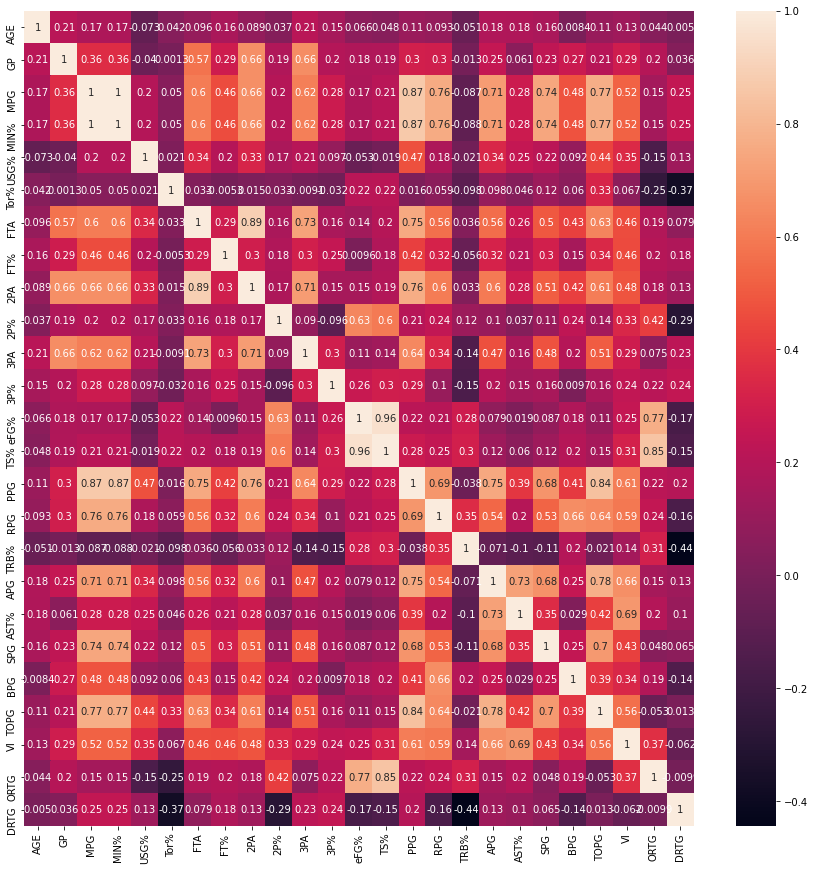

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
sns.heatmap(mydf[['FULL NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'MIN%', 'USG%', 'Tor%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG',
       'TRB%', 'APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
        ].corr(),annot=True, ax = ax)

I created a pairplot to analyze if there are any other significant variables that have an effect on the versatility index. It can be noted that turnovers per game (TOPG) has a higher level of correlation based on the more clearer spread of the data when it is compared to versatility index. There are also other variables that have a similar relationship, including total rebound percentage (USG%), free throw average (FTA), free throw percentage (FT%), and two-point average (2PA).

In [ ]:
#sns.pairplot(mydf)

I created a bar graph that analyzes the relationship between turnovers per game made by a player to determine if this would be an effective variable to strengthen the predictions of versatility index. I specifically chose the turnovers per game because the versatility index is calculated by multiplying the points per game, rebounds per game, as well as assists per game to the power of 0.333 (technical terms:  VI = [(PPG)*(RPG)*APG)]^(0.333)  ).
The graph shows that the data is left skewed, indicating that a player with more turnovers per game has a higher chance of having a higher versatility index.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


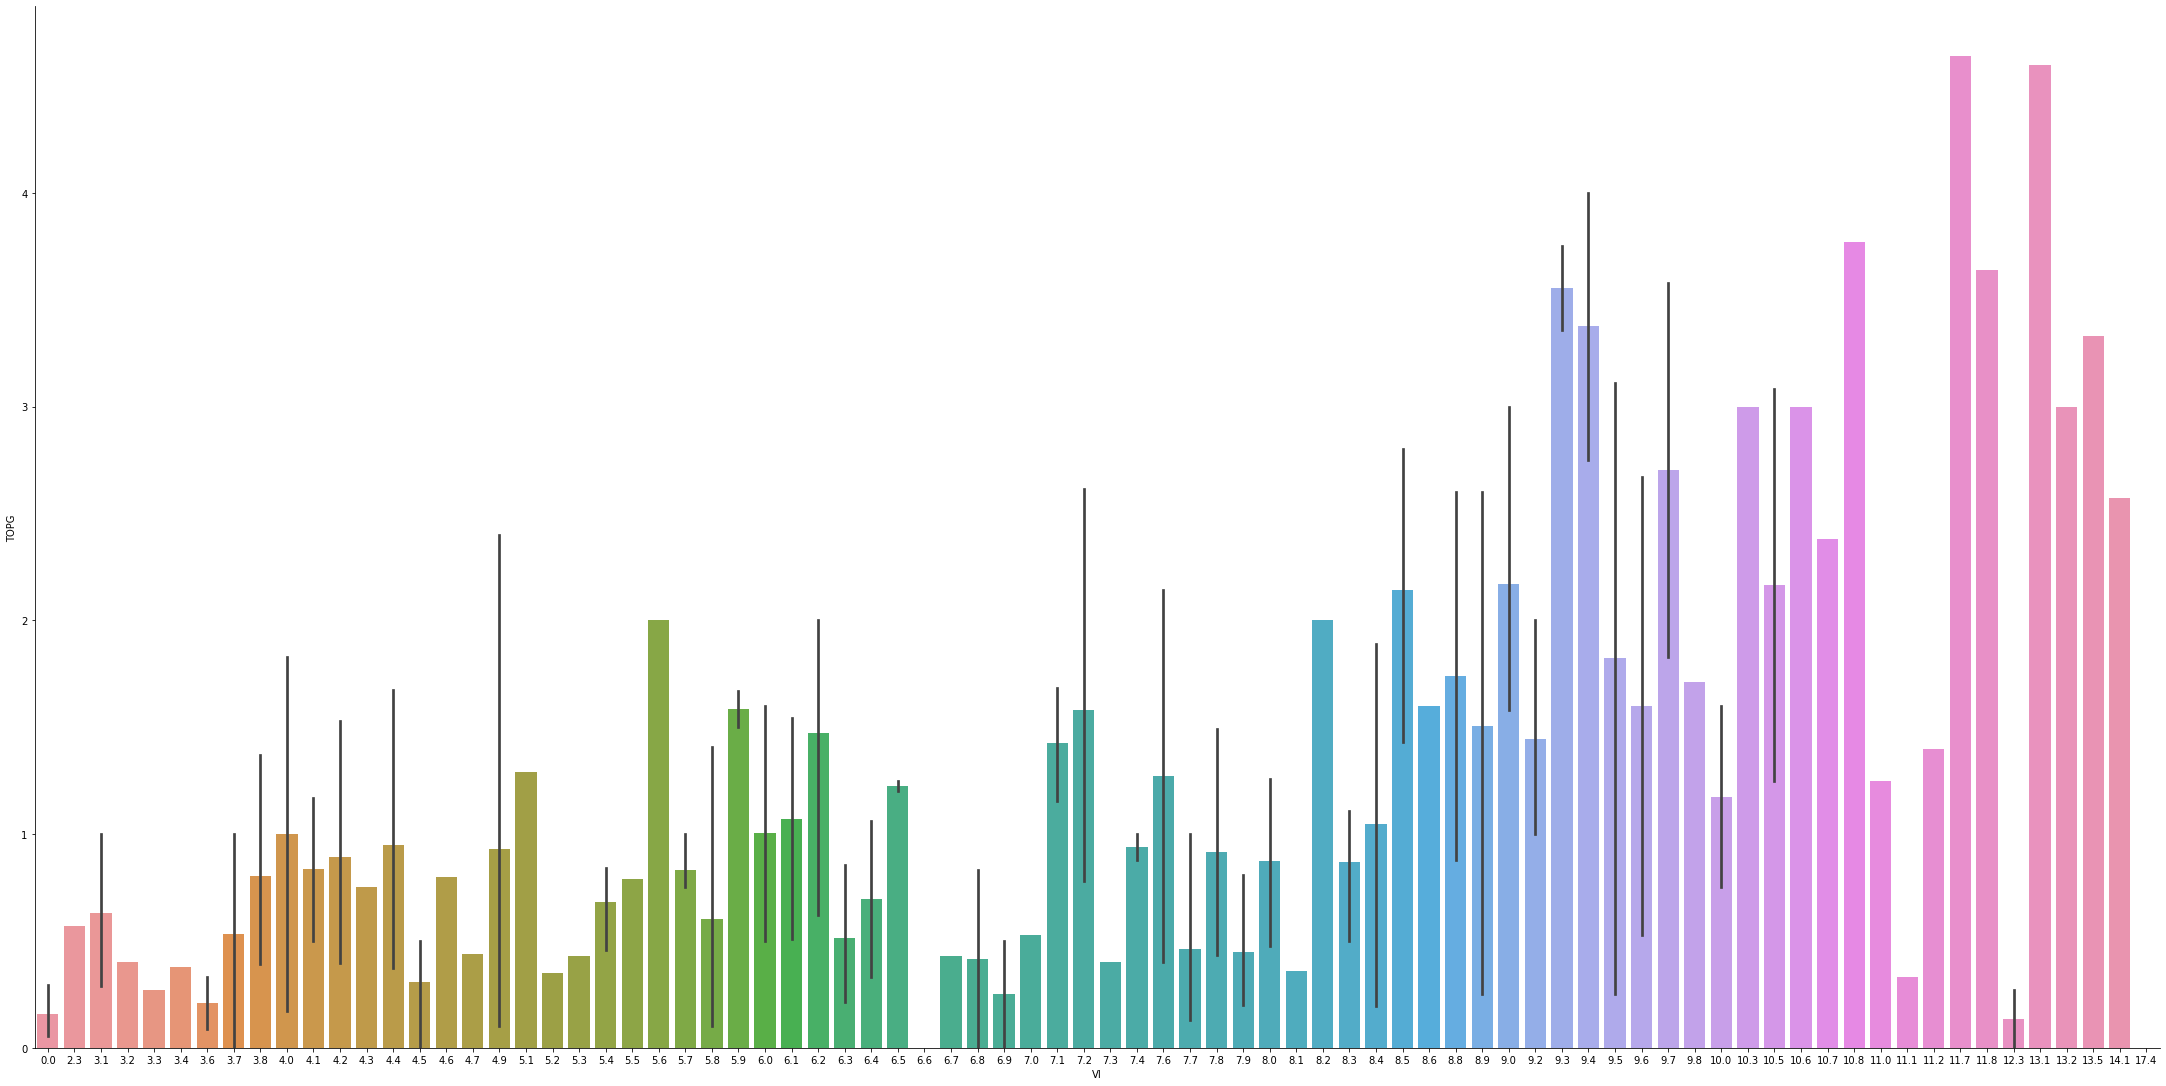

In [ ]:
sns.factorplot(x = "VI", y = "TOPG", data = mydf, kind = "bar", size = 15, aspect = 2)

I created lineplots of free throw percentage and free throw average to compare to the versatility index. Both of these variables had the same level of correlation in the heatmap.

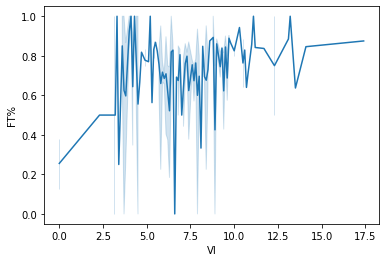

In [ ]:
sns.lineplot(data = mydf, x = "VI", y = "FT%")

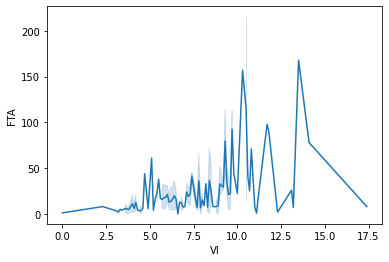

In [ ]:
sns.lineplot(data = mydf, x = "VI", y = "FTA")

I create a boxplot of Games Played (GP) and AGE to determine any outliers.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


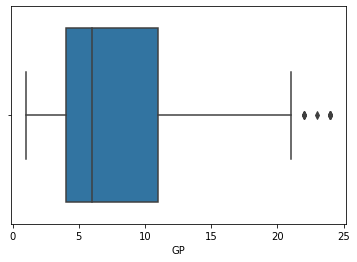

In [ ]:
sns.boxplot(mydf.GP)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


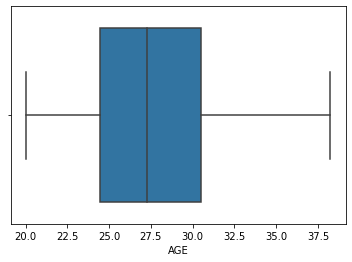

In [ ]:
sns.boxplot(mydf.AGE)

In [ ]:
x = mydf.iloc[:,[2,3]].values

I create a copy of my dataframe to drop variables that are irrelevant and negatively affect the accuracy of my model.

In [ ]:
mydf1 = mydf.copy()

In [ ]:
mydf1.drop(labels = ['FULL NAME','TEAM','POS', 'DRTG', 'Tor%', 'TRB%', 'AGE'], axis = 1, inplace = True)
mydf1 = mydf1.fillna(0)
mydf1.astype(int)

,GP,MPG,MIN%,USG%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,AST%,SPG,BPG,TOPG,VI,ORTG
0,24,30,63,13,46,0,91,0,89,0,0,0,9,6,3,14,0,1,0,7,118
1,24,28,59,12,23,0,36,0,119,0,0,0,6,3,1,5,1,0,1,4,97
2,24,20,43,21,42,0,155,0,38,0,0,0,9,6,0,7,0,0,1,7,105
3,24,39,81,32,216,0,351,0,145,0,0,0,30,9,3,19,1,0,3,10,118
4,24,37,78,18,81,0,133,0,145,0,0,0,15,4,6,27,1,0,2,8,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2,2,4,60,1,0,2,0,3,0,0,0,2,0,0,0,0,0,0,0,0
208,1,9,20,18,2,1,2,0,1,0,0,0,2,3,0,0,0,0,0,0,77
209,1,4,10,20,1,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,80
210,1,1,3,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


This is to eliminate outliers in the dataset.

In [ ]:
print(mydf1)
import scipy 
from scipy import stats
zscore = stats.zscore(mydf1)
abs_z_scores = np.abs(zscore)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
mydf1 = mydf1[filtered_entries]

     GP   MPG  MIN%  USG%  FTA    FT%  ...  AST%   SPG   BPG  TOPG    VI   ORTG
0    24  30.6  63.8  13.6   46  0.870  ...  14.7  0.88  1.08  0.88   7.4  118.4
1    24  28.5  59.4  12.6   23  0.913  ...   5.4  1.29  0.46  1.08   4.2   97.4
2    24  20.8  43.4  21.4   42  0.762  ...   7.4  0.46  0.96  1.04   7.1  105.5
3    24  39.1  81.6  32.0  216  0.884  ...  19.3  1.67  0.71  3.08  10.5  118.9
4    24  37.5  78.2  18.4   81  0.802  ...  27.5  1.29  0.29  2.21   8.4  116.8
..   ..   ...   ...   ...  ...    ...  ...   ...   ...   ...   ...   ...    ...
207   2   2.1   4.3  60.0    1  0.000  ...   0.0  0.00  0.50  0.00   0.0    0.0
208   1   9.8  20.4  18.2    2  1.000  ...   0.0  0.00  0.00  0.00   0.0   77.5
209   1   4.9  10.2  20.9    1  0.000  ...   0.0  0.00  0.00  0.00   0.0   80.2
210   1   1.6   3.3  28.7    0  0.000  ...   0.0  0.00  0.00  1.00   0.0    0.0
211   1   1.6   3.3   0.0    0  0.000  ...   0.0  0.00  0.00  0.00   0.0    0.0

[212 rows x 21 columns]


I implement machine learning by splitting the data into subsets. These subsets, x_train, y_train, x_test, y_test, are designed to process the data and use them in different ways. The train subset will take a large portion of the data to train the model to see and learn from the model. The test subset will take a smaller portion of the data to test the newly trained model. Because versaitility index is continous, I apply linear regression to produce an R-squared score (0.77544). This score is high enough to support the accuracy of my newly created model. 

In [ ]:
train = mydf1[:len(mydf1)]
x_train = train.drop(labels = "VI", axis = 1)
y_train = train["VI"]
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize = True)
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(linreg.score(x_test,y_test))


0.7754441061519781


Here I created a new dataframe that has a copy of the new test set. I created a column called "VI_pred" which predicts the future versatility index of each player based on the correlations between other variables. 

In [ ]:
newdf = x_test.copy()
newdf['VI'] = y_test
newdf.reset_index(inplace = True)
newdf['VI_pred'] = linreg.predict(x_test)
print(newdf)

    index  GP   MPG  MIN%  USG%  FTA  ...   SPG   BPG  TOPG   ORTG    VI    VI_pred
0     166   4  20.2  42.1  22.7    4  ...  0.75  0.25  1.00   77.3   7.7   7.729543
1     140   5  27.4  57.2  17.6    4  ...  0.40  0.40  2.00   97.3   6.2   6.332212
2     161   4  27.5  57.2  13.7    0  ...  0.50  1.00  0.50   97.5   4.5   2.952182
3      71   9  34.5  71.8  19.3   18  ...  0.44  0.78  2.11  107.1   9.5   9.684938
4     114   5  29.6  61.6  33.4   13  ...  1.40  0.20  2.80   89.9   8.5   8.118271
5      41  14  21.3  44.3  20.6   28  ...  0.71  0.21  1.00  102.7   5.7   5.527177
6     199   2   5.5  11.5  23.6    3  ...  0.00  0.00  0.50   88.3   8.3  11.262605
7      67   9   8.3  17.3  15.8    0  ...  0.22  0.11  0.11  106.4   6.3   7.386102
8     120   5  32.8  68.3  22.5   19  ...  1.20  0.20  2.60  103.8   8.9   9.870693
9     179   3   4.5   9.4  20.4    0  ...  0.00  0.00  0.33   79.4   0.0   1.428449
10     30  15  34.4  71.6  21.0   52  ...  0.60  0.00  1.93  112.9   9.0   8

# I further create boxplots of remaining variables to determine whether there are outliers among the variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


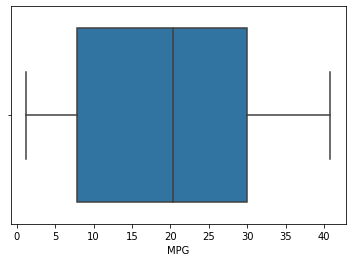

In [ ]:
sns.boxplot(mydf.MPG)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


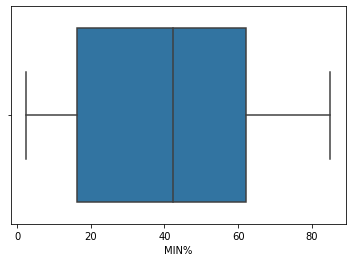

In [ ]:
sns.boxplot(mydf["MIN%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


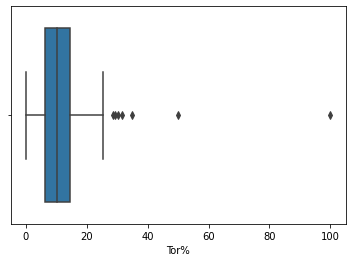

In [ ]:
sns.boxplot(mydf["Tor%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


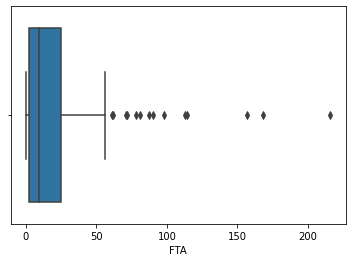

In [ ]:
sns.boxplot(mydf.FTA)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


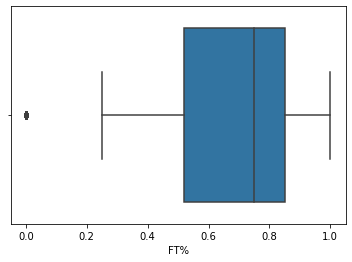

In [ ]:
sns.boxplot(mydf["FT%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


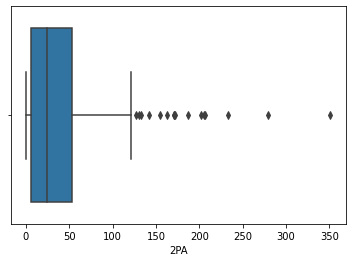

In [ ]:
sns.boxplot(mydf["2PA"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


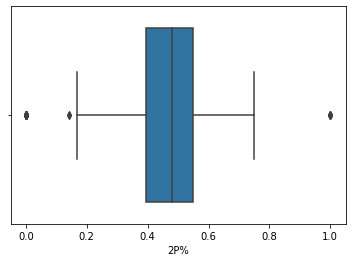

In [ ]:
sns.boxplot(mydf["2P%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


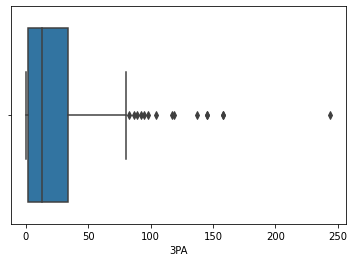

In [ ]:
sns.boxplot(mydf["3PA"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


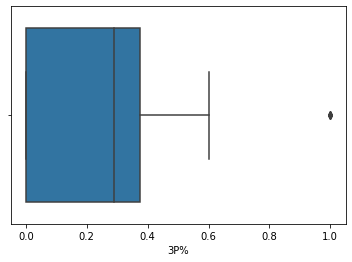

In [ ]:
sns.boxplot(mydf["3P%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


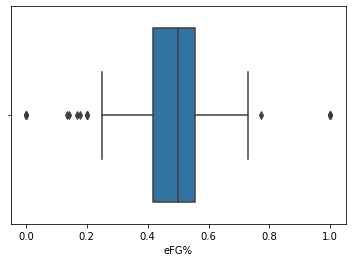

In [ ]:
sns.boxplot(mydf["eFG%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


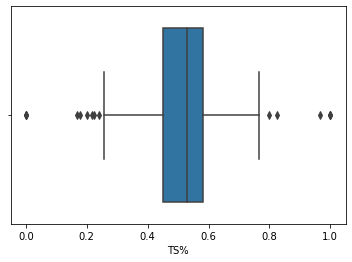

In [ ]:
sns.boxplot(mydf["TS%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


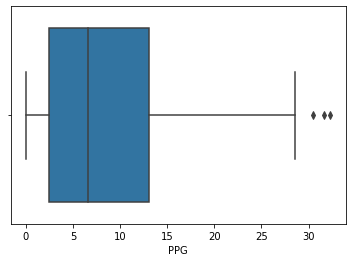

In [ ]:
sns.boxplot(mydf["PPG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


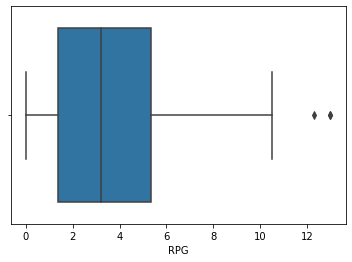

In [ ]:
sns.boxplot(mydf["RPG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


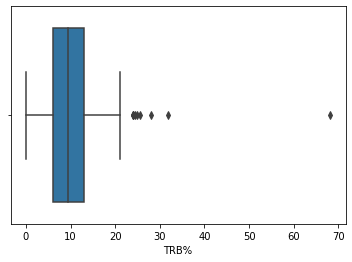

In [ ]:
sns.boxplot(mydf["TRB%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


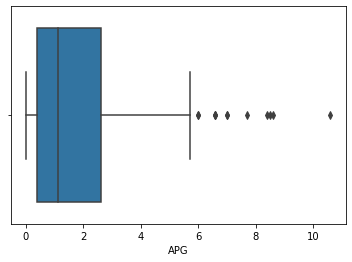

In [ ]:
sns.boxplot(mydf["APG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


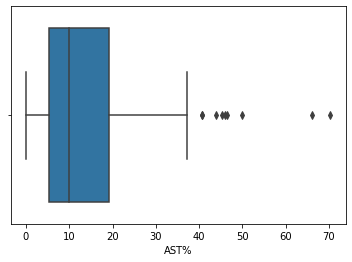

In [ ]:
sns.boxplot(mydf["AST%"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


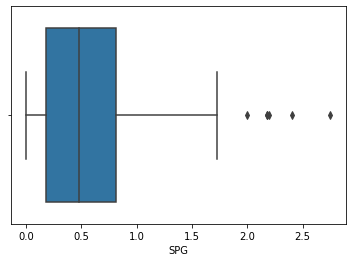

In [ ]:
sns.boxplot(mydf["SPG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


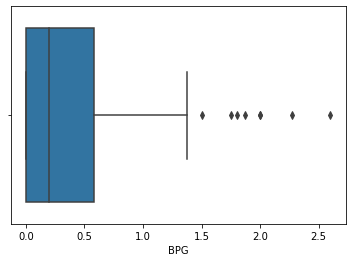

In [ ]:
sns.boxplot(mydf["BPG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


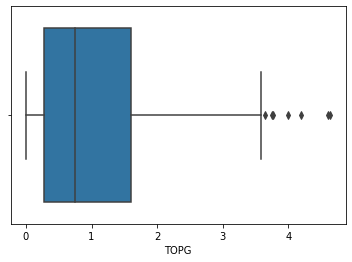

In [ ]:
sns.boxplot(mydf["TOPG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


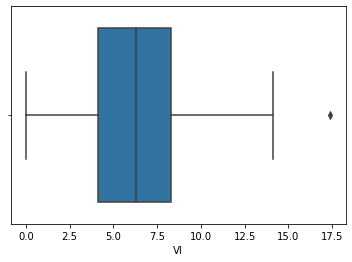

In [ ]:
sns.boxplot(mydf["VI"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


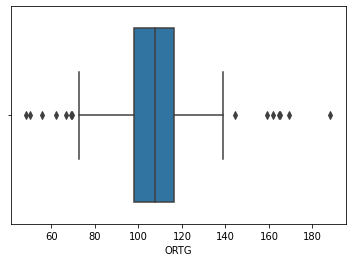

In [ ]:
sns.boxplot(mydf["ORTG"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


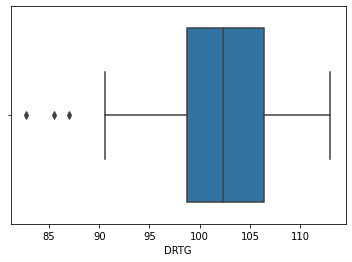

In [ ]:
sns.boxplot(mydf["DRTG"])